# 11 Health SHAP Analysis

###### **Project:** NORI  
**Author:** Yuseof J  
**Date:** 28/12/25

### **Purpose**
In this notebook, we'll use SHAP to interpret how tract-level environmental, demographic, and scocioeconomic charctaeristics contribute to the model's predictions of health outcomes.

### **Inputs**
- ``

### **Outputs**
- ``
  
--------------------------------------------------------------------------

### 0. Imports and Setup

In [12]:
# package imports
import os
import shap
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# specify filepaths
path_model_features = 'data/processed/master_features.csv'
path_model_targets = 'data/processed/outcomes_health.csv'
path_final_model_pkl = 'models/xgb_health_model.pkl'


# ensure cwd is project root for file paths to function properly
project_root = Path(os.getcwd())            # get current directory
while not (project_root / "data").exists(): # keep moving up until in parent
    project_root = project_root.parent
os.chdir(project_root)                      # switch to parent directory

### 1. Load Data

In [13]:
# load economic mobility model
with open(path_final_model_pkl, 'rb') as model_file:
    model = pickle.load(model_file)

# load tracts with features 
X = pd.read_csv(path_model_features)

### 2. SHAP Analysis

In [14]:
# drop nan rows in feature set before running shap 
X = X.dropna()

# drop geoid
X.drop(columns=['GEOID'], inplace=True)

In [15]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 98%|===================| 2117/2168 [00:14<00:00]        

#### **A. Global Importance Plot**

Identify Drivers: Which features matter most overall to the model's predictions?

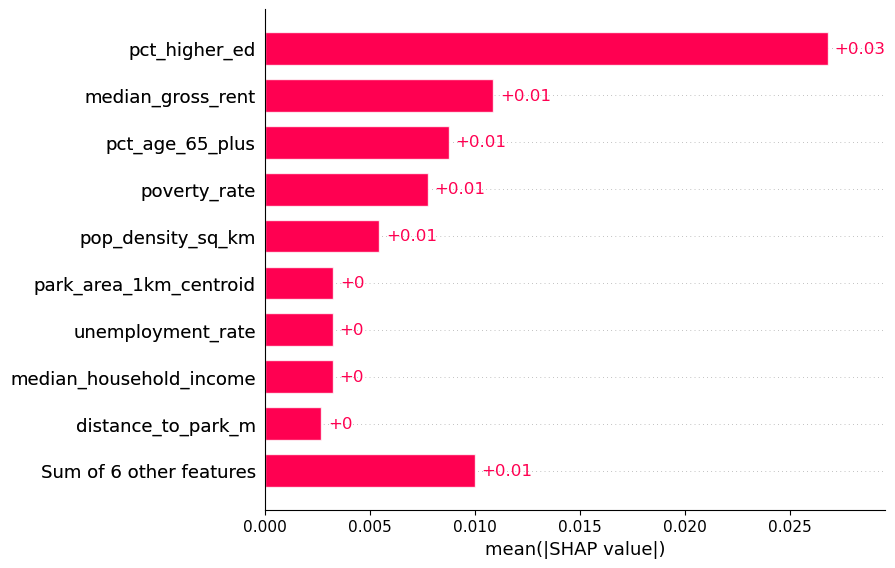

In [16]:
shap.plots.bar(shap_values)

Here we see that the top driver of the model's health outcomes predictions is pct_higher_education, along with some additional demographic and socioeconomic influencers. We also see some of our park / green space features are influencing the model's predictions. This mix of features indicates that the models predictions are influenced by tract-level demographics/socioeconomics in addition to the built/natural environment.

#### **B. Beeswarm Plot**

Driver Behaviors: How do high and low feature values impact model predictions across tracts?

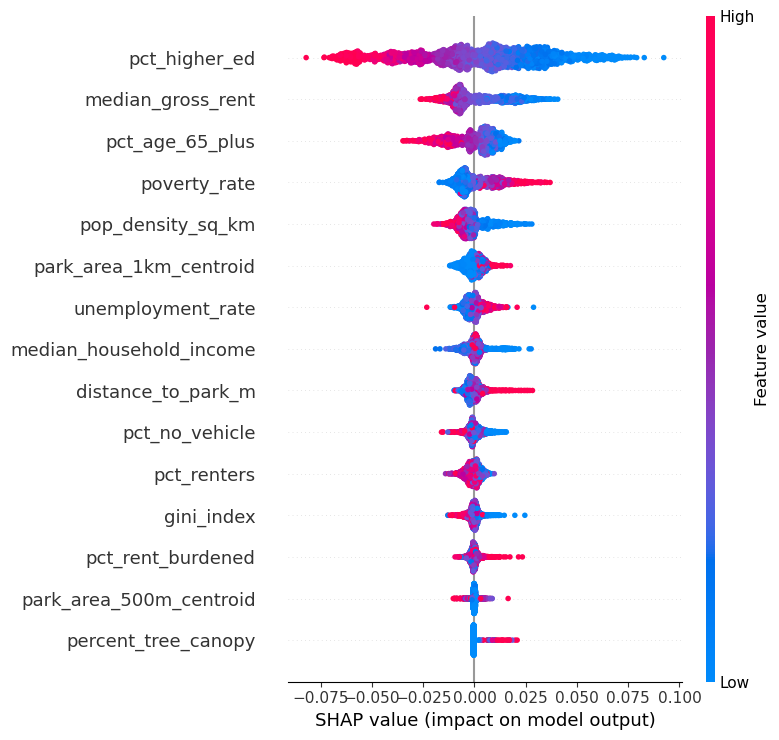

In [17]:
shap.summary_plot(shap_values, X)

This SHAP beeswarm plot gives us an idea of how specific values of the model's most influential features contribute to the model's predictions for long-run mobility outcomes. Importantly, these observed relationships are correlations learned by the model rather than causal effects. As such, these results should be interpreted as signals for further investigation, such as causal inference, in order to make any policy reccomendations based on the features observed in the plot.

The highest drivers of model predictions are pct_higher_ed, median_gross_rent, and pct_age_65_plus. In general, they suggest high feature values are somewhat aligned with lower model preictions, and vice versa. However, they do not display perfectly linear shapes (we see some clustering). Additionally, given the large spread of the prediction points, theres a possibility that the features behave differently depending on neighborhood context and relationships with other feaatures. We will investigate this further in the dependence plots below. 

#### **C. Dependence Plots**

How do model predictions change with respect to individual features?

In this section, we take a closer look at 
1. High-influence features
2. Features that display clustering and non-linear shapes (offer potential insights into nonlinear and context-dependent relationships)
3. Features that are particularly relevant to the policy question's being asked (e.g. How does the built environment impact health and long-run economic mobility? Which neighborhood characteristics are associated with favorable and unfavorable health and mobility outcomes?)

Here we observe a positive association between gini-index and economic mobility predictions, but it is **not perfectly linear.** We actually see clusters forming in a stepwise fashion. 

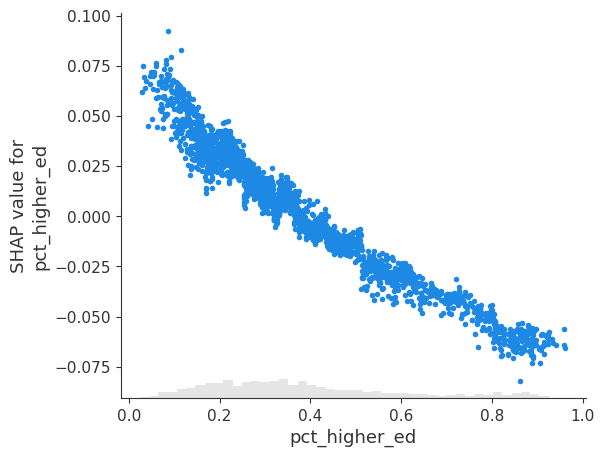

In [18]:
shap.plots.scatter(shap_values[:, "pct_higher_ed"])

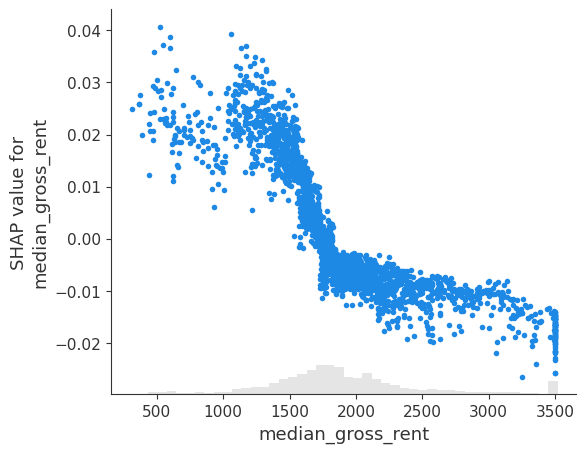

In [19]:
shap.plots.scatter(shap_values[:, "median_gross_rent"])

Here we observe a relatively neutral impact of higher education on model predictions, up until about 80% prevalence of higher ed degrees. At this point, we observe a negative association with predicted mobility outcomes. 

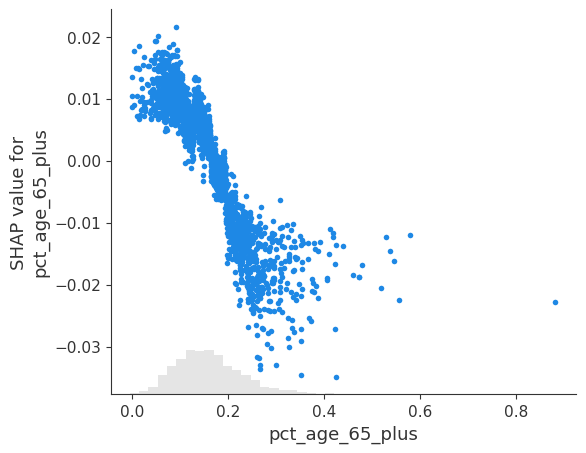

In [20]:
shap.plots.scatter(shap_values[:, "pct_age_65_plus"])

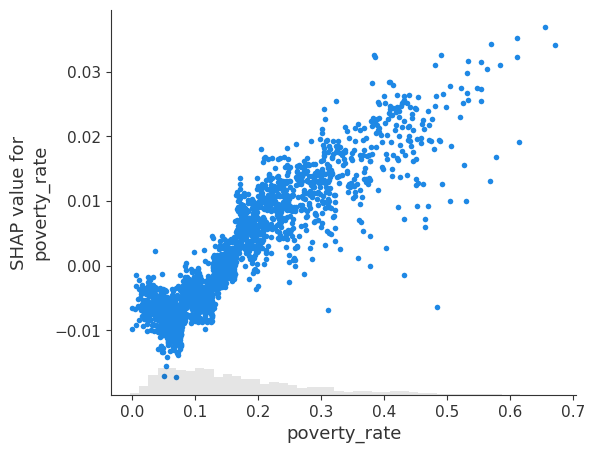

In [21]:
shap.plots.scatter(shap_values[:, "poverty_rate"])

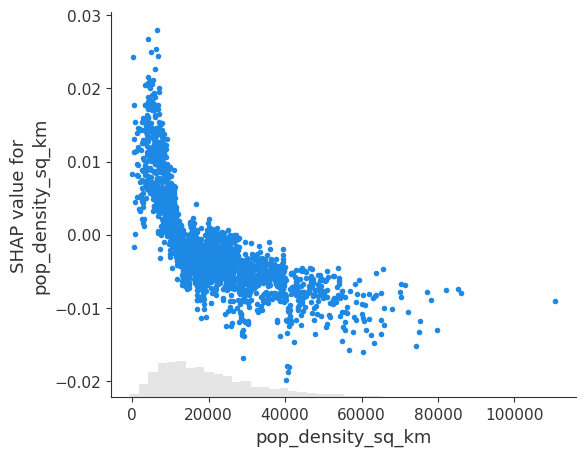

In [22]:
shap.plots.scatter(shap_values[:, "pop_density_sq_km"])

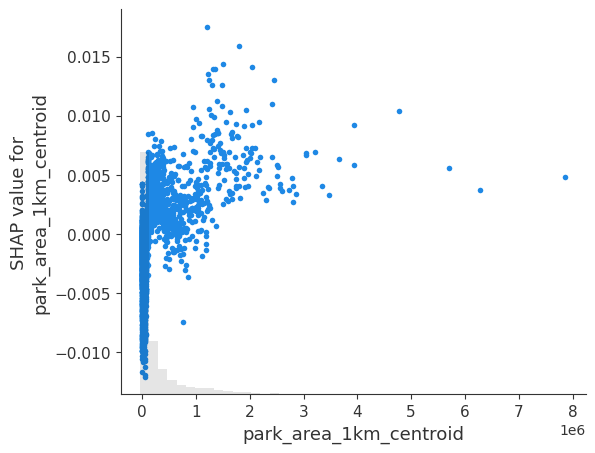

In [23]:
shap.plots.scatter(shap_values[:, "park_area_1km_centroid"])

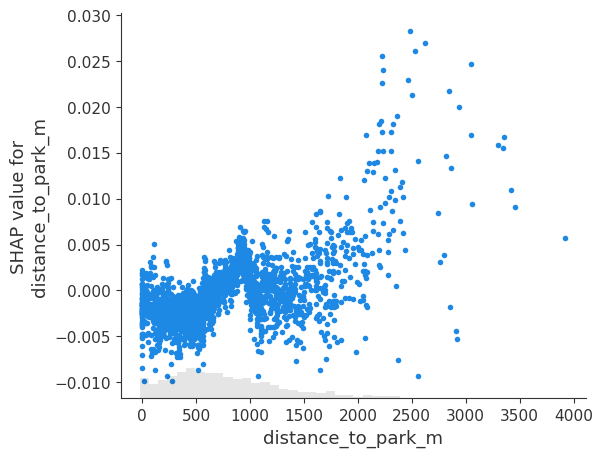

In [24]:
shap.plots.scatter(shap_values[:, "distance_to_park_m"])